<a href="https://colab.research.google.com/github/Aaryant31/Credit-Card-Default-Prediction/blob/main/Rahul_kumar_soni_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [255]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [256]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'


In [257]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [258]:
#reading data
df=pd.read_excel(data,header=1)

# Data inspection

In [259]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [260]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [261]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [262]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [263]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [264]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [265]:
#viewing Data

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data cleaning

In [266]:
df['LIMIT_BAL'].max()

1000000

In [267]:
df['LIMIT_BAL'].min()

10000

In [268]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [269]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [270]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Looking for Outlier Using Isolation Forest

In [271]:
# importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#creating instance of minmaxscaler
minmax = MinMaxScaler(feature_range=(0, 1))
scale_df = minmax.fit_transform(df.drop('Defaulters',axis=1))

In [272]:
#imprting IsolationForeest for outlier detection
from sklearn.ensemble import IsolationForest

In [273]:
#creating instance of isolation forest
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(scale_df)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(scale_df)
        
# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(scale_df)

In [274]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1


In [275]:
#looking the outlier
df[(df['multivariate_outlier'] == -1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,-0.047298,-1
59,400000,2,2,1,29,0,0,0,0,0,0,400134,398857,404205,360199,356656,364089,17000,15029,30000,12000,12000,23000,0,-0.018764,-1
102,480000,1,1,1,63,0,0,0,2,2,0,422069,431342,479432,487066,471145,469961,16078,55693,17000,0,18000,24200,0,-0.075574,-1
214,470000,1,2,2,27,2,2,2,2,0,0,296573,303320,307843,479978,305145,309959,13000,11001,0,10484,10838,10367,0,-0.025251,-1
360,500000,2,2,2,23,4,3,2,0,0,0,507726,509229,499936,505507,484612,419643,10000,0,14000,16500,16000,19000,1,-0.073183,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,0,474934,507062,491956,430637,376657,356636,40024,325,15296,12137,12312,14113,0,-0.042915,-1
29820,400000,1,2,2,37,1,-1,0,0,0,0,396343,394858,395716,385947,305542,271385,423903,15100,14600,13000,9500,9500,0,-0.053828,-1
29837,500000,1,1,2,34,0,0,0,0,0,0,494356,488578,488166,485249,441981,424592,17438,18852,16673,15244,15216,16037,0,-0.029139,-1
29883,420000,1,1,1,34,0,0,0,0,0,0,454391,466810,483277,479800,489200,489200,20000,24000,11000,10000,0,11000,0,-0.026219,-1


In [276]:
#removing Outliers
df=df.drop( df[ df['multivariate_outlier'] == -1 ].index)

In [277]:
#checking the shape of df after removing outlier
df.shape

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,0.160149,1
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,0.225738,1
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,0.160435,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,0.155985,1


# Exploratory Data Analysis and feature Engineering

In [278]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23152
1     6548
Name: Defaulters, dtype: int64

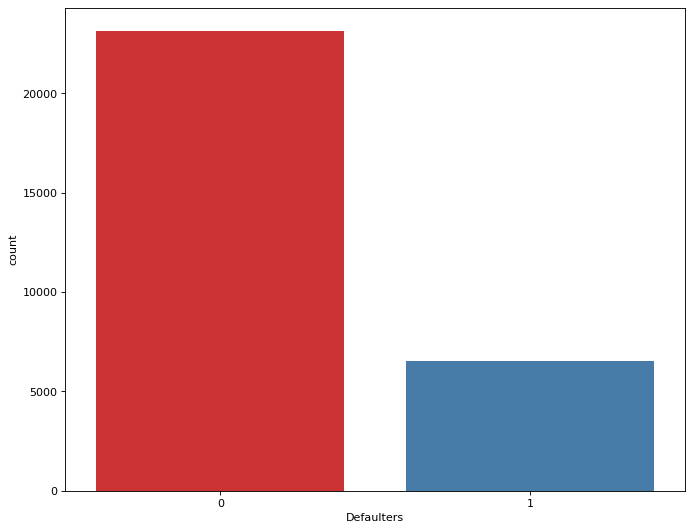

In [279]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [280]:
#analysing categorical variable
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [281]:
#creating different df for categorical variable
df_cat = df[categorical_features]


In [282]:
#checking shape of categorical variable
df_cat.shape

(29700, 3)

In [283]:
#looking into categorical df
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [284]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    17960
1    11740
Name: SEX, dtype: int64

count of EDUCATION features

2    13921
1    10437
3     4886
5      271
4      123
6       48
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15837
1    13487
3      322
0       54
Name: MARRIAGE, dtype: int64



In [285]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [286]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


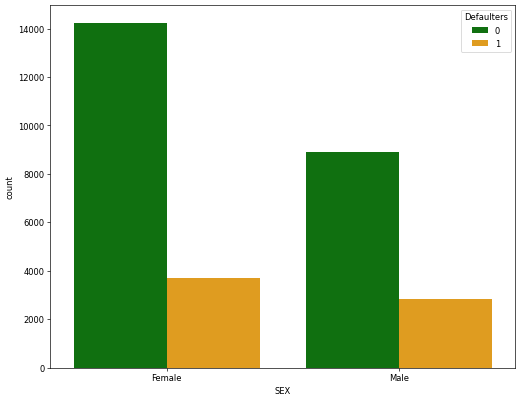

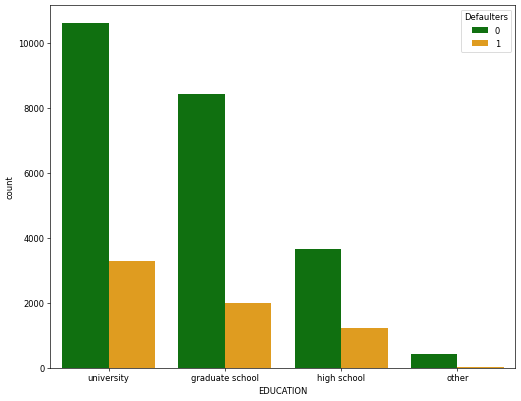

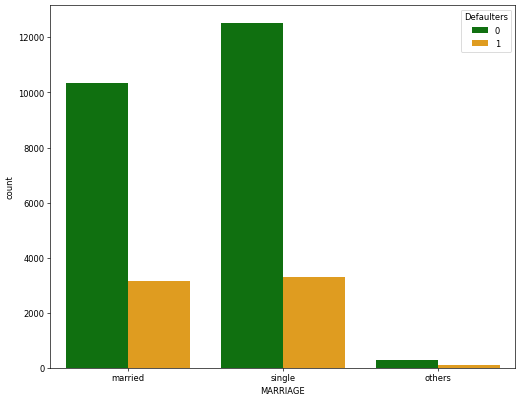

In [287]:
#ploting count plot of  categorical df
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

In [288]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    17960
Male      11740
Name: SEX, dtype: int64

count of EDUCATION features

university         13921
graduate school    10437
high school         4886
other                456
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15837
married    13487
others       376
Name: MARRIAGE, dtype: int64



In [289]:
#creating defaulter variable on df_cat
df_cat['Defaulter'] = df['Defaulters']

In [290]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [291]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207071
1    Male   0.240971
         EDUCATION  Defaulter
0  graduate school   0.191722
1      high school   0.251535
2            other   0.070175
3       university   0.236046
  MARRIAGE  Defaulter
0  married   0.233929
1   others   0.236702
2   single   0.208625


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [292]:
#desribing age variable
df['AGE'].describe()

count    29700.000000
mean        35.435892
std          9.199220
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         75.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [293]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [294]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [295]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1,31-40
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1,51-60


In [296]:
#cheacking the count of age_group
df['age_group'].value_counts().sort_values(ascending=False)

21-30         10963
31-40         10604
41-50          5909
51-60          1966
60 & above      258
Name: age_group, dtype: int64

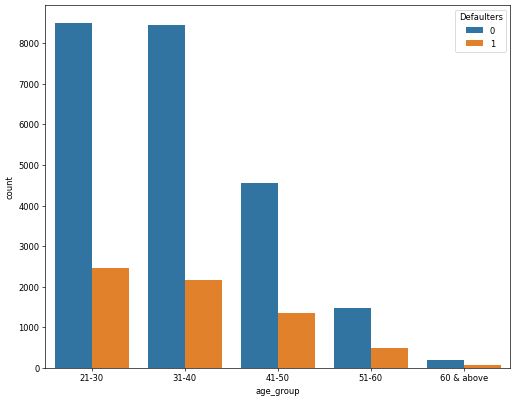

In [297]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [298]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224209
1,31-40,0.203697
2,41-50,0.230496
3,51-60,0.252798
4,60 & above,0.275194


### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [ ]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [301]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,multivariate_anomaly_score,multivariate_outlier,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.193236,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.214444,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.272661,1,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.265480,1,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.175220,1,51-60


In [302]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,-0.023030,-0.140337,-0.172290,-0.226162,-0.271414,-0.296397
std,1.113999,1.189467,1.192355,1.166583,1.132032,1.149251
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [303]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,29700.000000,2.970000e+04,29700.000000,29700.000000,29700.000000,29700.000000
mean,5359.661818,5.408550e+03,4903.847407,4598.541246,4553.933872,4823.623670
std,14282.084238,1.620293e+04,14757.256529,14558.191350,14114.856319,15656.614427
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,990.000000,8.150000e+02,390.000000,283.750000,237.750000,100.000000
50%,2100.000000,2.000000e+03,1791.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4360.000000,4000.000000,4000.000000,4000.000000
max,505000.000000,1.024516e+06,417588.000000,528897.000000,426529.000000,528666.000000


In [304]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000,29700.000000
mean,48175.440943,46158.394949,43866.258485,40254.475791,37495.571347,36253.206431
std,65622.377293,62924.272430,60393.851965,55940.313243,52710.101639,52060.625452
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3458.750000,2899.000000,2551.000000,2250.000000,1699.750000,1200.000000
50%,21708.500000,20650.000000,19779.500000,18783.000000,17860.000000,16699.000000
75%,64829.000000,61729.750000,58425.500000,52032.000000,49123.750000,48276.500000
max,746814.000000,512650.000000,855086.000000,628699.000000,514114.000000,499100.000000


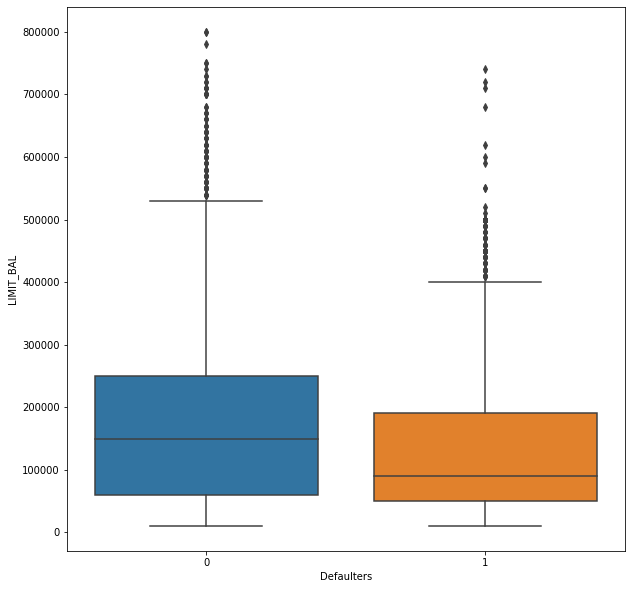

In [305]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

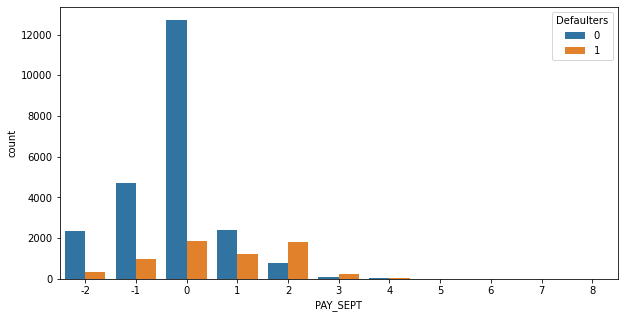

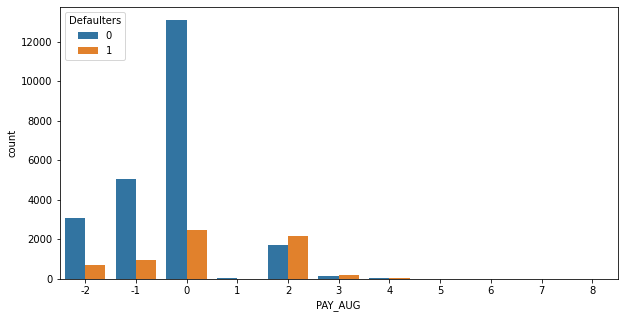

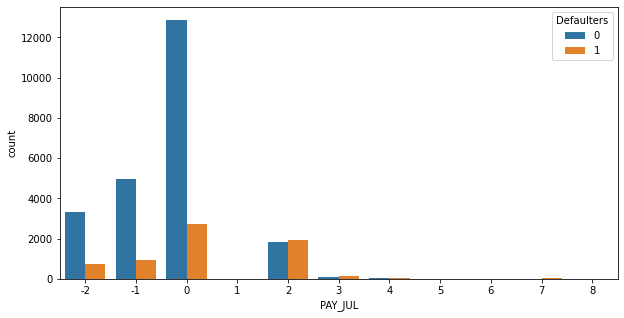

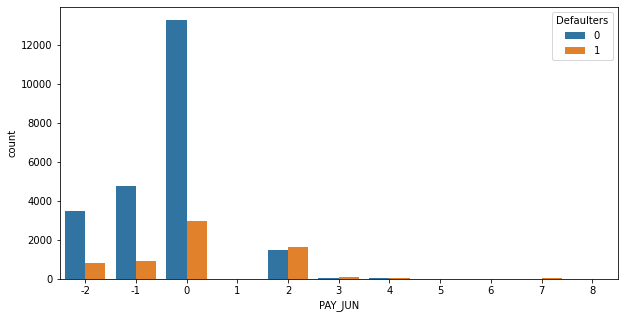

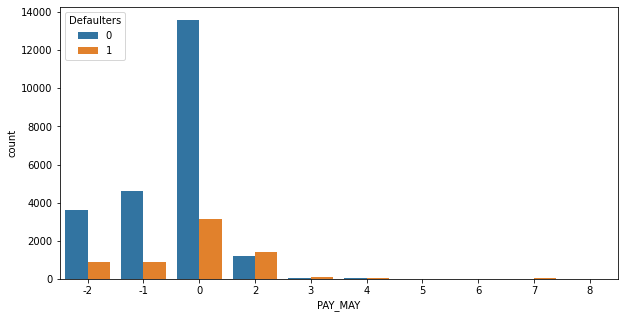

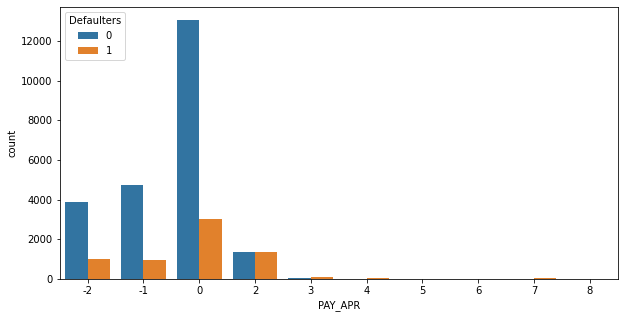

In [306]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [307]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29700 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   29700 non-null  int64  
 1   SEX                         29700 non-null  int64  
 2   EDUCATION                   29700 non-null  int64  
 3   MARRIAGE                    29700 non-null  int64  
 4   PAY_SEPT                    29700 non-null  int64  
 5   PAY_AUG                     29700 non-null  int64  
 6   PAY_JUL                     29700 non-null  int64  
 7   PAY_JUN                     29700 non-null  int64  
 8   PAY_MAY                     29700 non-null  int64  
 9   PAY_APR                     29700 non-null  int64  
 10  BILL_AMT_SEPT               29700 non-null  int64  
 11  BILL_AMT_AUG                29700 non-null  int64  
 12  BILL_AMT_JUL                29700 non-null  int64  
 13  BILL_AMT_JUN                297

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [308]:
#spliting independent Variable
X=df.drop(['Defaulters','multivariate_anomaly_score','multivariate_outlier'],axis=1)

In [309]:
#looking into independent variable
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [310]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [311]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [312]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [313]:
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [314]:
#spliting Dependent variable
y=df['Defaulters']

In [315]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29700
Resampled dataset shape 46304


In [316]:
#now checking the count of dependent variaable after balancing
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23152],
       [    1, 23152]])

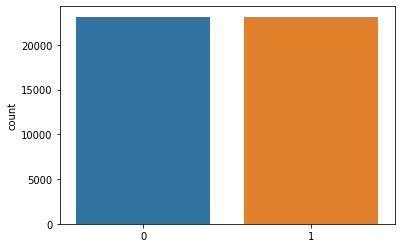

In [317]:
sns.countplot(y_smote)

## Train | Test Split

In [318]:
#spliting data set into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [319]:
#looking into independent variable of train dataset
X_train

array([[ 50000,      0,     -1, ...,      0,      1,      0],
       [ 90000,      1,      2, ...,      0,      0,      0],
       [ 10000,      0,      0, ...,      0,      0,      0],
       ...,
       [190000,      0,      0, ...,      0,      0,      0],
       [ 20000,      1,     -1, ...,      0,      0,      0],
       [ 20000,      1,      0, ...,      0,      0,      0]])

In [320]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [321]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [322]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


# creating function to get feature importance 

In [323]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [324]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [325]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [326]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.0093min 

score matrix for train
********************************************************************************
The accuracy is  0.8654399907855332
The precision is  0.9528308639324314
The recall is  0.7683250606025627
The f1 is  0.8506885643991438
the auc  is  0.8652279250834902

confusion_matrix 
  [[16743   659]
 [ 4014 13312]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17402
           1       0.95      0.77      0.85     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.86     34728
weighted avg       0.88      0.87      0.86     34728



score matrix for test
********************************************************************************
The accuracy is  0.8623013130615066
The precision is  0.9519436138402392
The recall is  0.7650188808788191
The f1 is  0.8483060525314047
the auc  is  0.8629442230481053

confusion_matrix 
  [[

### implementing GridSearch for Hyperparameter Tuning

In [327]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [328]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

In [329]:
#running and evaluating grid_log_model using function ccreated
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.0s finished


Training time: 0.1209min 

score matrix for train
********************************************************************************
The accuracy is  0.8598537203409353
The precision is  0.9342022722520388
The recall is  0.7735772826965255
The f1 is  0.8463359959587029
the auc  is  0.8596653221895454

confusion_matrix 
  [[16458   944]
 [ 3923 13403]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     17402
           1       0.93      0.77      0.85     17326

    accuracy                           0.86     34728
   macro avg       0.87      0.86      0.86     34728
weighted avg       0.87      0.86      0.86     34728



score matrix for test
********************************************************************************
The accuracy is  0.8527988942639945
The precision is  0.9297331109257715
The recall is  0.7653621695846207
The f1 is  0.8395782338542649
the auc  is  0.8533767369662234

confusion_matrix 
  [[

In [330]:
#getting the coeficient of best estimator
grid_log_model.best_estimator_.coef_

array([[-6.58794433e-02,  4.39410657e-01,  1.14402669e-01,
         6.28888345e-02,  5.10934677e-02,  4.15571778e-02,
         2.88308092e-02, -1.00731622e-01, -2.13007964e-02,
         4.63565899e-04, -3.48290910e-03, -9.95201258e-03,
         1.32523026e-02, -1.26567231e-01, -1.42412182e-01,
        -7.05036948e-02, -5.09426183e-02, -6.32644879e-02,
        -5.07113803e-02, -5.69756884e-01, -5.06173895e-01,
        -5.29411673e-01, -4.43054435e-01, -2.09704048e-01,
        -5.95842862e-01, -4.88978067e-01, -1.23387224e-01,
        -5.88850619e-01, -6.21502929e-01, -6.14422817e-01,
        -4.83230823e-01, -3.00556744e-01, -1.06130647e-01]])

In [331]:
optimal_log_model=grid_log_model.best_estimator_.coef_

In [332]:
#ccreating dataframe for feature imp
feature_importance = pd.DataFrame({'Features':X.columns, 'Importance':np.abs(optimal_log_model).ravel() })

In [333]:
#sorting the feat impt df by importance
imp_feat = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

In [334]:
imp_feat

,Features,Importance
28,age_group_21-30,0.621503
29,age_group_31-40,0.614423
24,EDUCATION_university,0.595843
27,MARRIAGE_single,0.588851
19,SEX_Female,0.569757
21,EDUCATION_graduate school,0.529412
20,SEX_Male,0.506174
25,MARRIAGE_married,0.488978
30,age_group_41-50,0.483231
22,EDUCATION_high school,0.443054


==========================Features Importance============================

 [[-6.58794433e-02  4.39410657e-01  1.14402669e-01  6.28888345e-02
   5.10934677e-02  4.15571778e-02  2.88308092e-02 -1.00731622e-01
  -2.13007964e-02  4.63565899e-04 -3.48290910e-03 -9.95201258e-03
   1.32523026e-02 -1.26567231e-01 -1.42412182e-01 -7.05036948e-02
  -5.09426183e-02 -6.32644879e-02 -5.07113803e-02 -5.69756884e-01
  -5.06173895e-01 -5.29411673e-01 -4.43054435e-01 -2.09704048e-01
  -5.95842862e-01 -4.88978067e-01 -1.23387224e-01 -5.88850619e-01
  -6.21502929e-01 -6.14422817e-01 -4.83230823e-01 -3.00556744e-01
  -1.06130647e-01]]



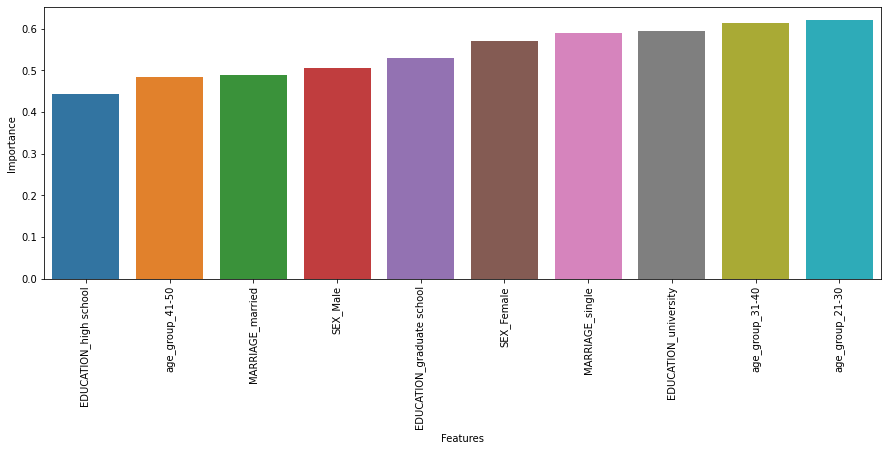

In [335]:
#visualizing the feature importance
imp_feat=imp_feat[imp_feat['Importance']>0]
imp_feat=imp_feat.sort_values('Importance')
plt.figure(figsize=(15,5))
print(f'==========================Features Importance============================\n\n {optimal_log_model}\
\n=========================================================================\n') 
sns.barplot(data=imp_feat,x=imp_feat.Features,y='Importance')
plt.xticks(rotation=90);

In [336]:
#geting the best Paramater of model
grid_log_model.best_params_

{'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [337]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0084min 

score matrix for train
********************************************************************************
The accuracy is  0.8270271826768025
The precision is  0.9027827200910967
The recall is  0.7321366732078957
The f1 is  0.8085540363960863
the auc  is  0.826819974346736

confusion_matrix 
  [[16036  1366]
 [ 4641 12685]]

Classification Report

              precision    recall  f1-score   support

           0       0.78      0.92      0.84     17402
           1       0.90      0.73      0.81     17326

    accuracy                           0.83     34728
   macro avg       0.84      0.83      0.83     34728
weighted avg       0.84      0.83      0.83     34728



score matrix for test
********************************************************************************
The accuracy is  0.8215272978576365
The precision is  0.8969594594594594
The recall is  0.729145211122554
The f1 is  0.8043931073660291
the auc  is  0.8221378229525813

confusion_matrix 
  [[52

In [338]:
DecisionTree.feature_importances_

array([0.0099501 , 0.08599261, 0.28196592, 0.        , 0.00220365,
       0.        , 0.02022447, 0.00897374, 0.00590806, 0.        ,
       0.00269705, 0.00681617, 0.        , 0.00661842, 0.01942141,
       0.01233318, 0.        , 0.        , 0.        , 0.01228073,
       0.08562879, 0.01525397, 0.03695524, 0.01703622, 0.0114793 ,
       0.23135992, 0.05627891, 0.05130518, 0.00387713, 0.00277304,
       0.00775629, 0.00491049, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  



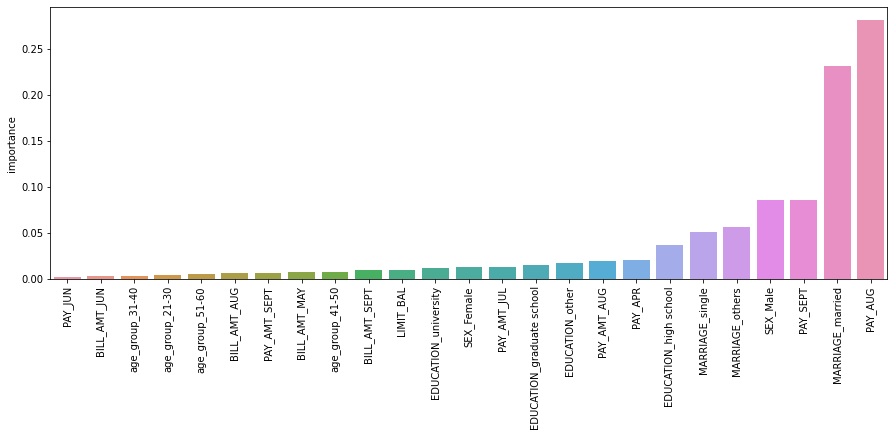

In [339]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [340]:
#importing Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [341]:
# training and evaluating the Random forest
run_and_evaluate_model(rfc_model,X_train, X_test, y_train, y_test)

Training time: 0.1207min 

score matrix for train
********************************************************************************
The accuracy is  0.9983010826998387
The precision is  0.9984987585888331
The recall is  0.9980953480318596
The f1 is  0.9982970125559243
the auc  is  0.9983006334458803

confusion_matrix 
  [[17376    26]
 [   33 17293]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17402
           1       1.00      1.00      1.00     17326

    accuracy                           1.00     34728
   macro avg       1.00      1.00      1.00     34728
weighted avg       1.00      1.00      1.00     34728



score matrix for test
********************************************************************************
The accuracy is  0.874913614374568
The precision is  0.9032792925571113
The recall is  0.8415722622725712
The f1 is  0.8713346365736627
the auc  is  0.875133957223242

confusion_matrix 
  [[52

### implementing gridsearch for hyperparameter tuning in Random Forest

In [342]:
# finding the best parameters for rfc_model by gridsearchcv
grid_values = {'n_estimators': [150,200,250],'max_depth': [3,5,9],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=5,verbose=5,n_jobs=-1)

In [343]:
# training and evaluating the Random forest with hyperparameter tuing
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.3min finished


Training time: 4.5348min 

score matrix for train
********************************************************************************
The accuracy is  0.8654687859940106
The precision is  0.9100453661697991
The recall is  0.8104582708068798
The f1 is  0.8573696422029553
the auc  is  0.8653486618946478

confusion_matrix 
  [[16014  1388]
 [ 3284 14042]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     17402
           1       0.91      0.81      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.87      0.87      0.87     34728
weighted avg       0.87      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8470110573600553
The precision is  0.8895292987512008
The recall is  0.7947133539306557
The f1 is  0.8394524521802195
the auc  is  0.8473566769653279

confusion_matrix 
  [[

In [344]:
#getting the best paramater of random forest
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}

In [345]:
#getting the best estimator for random forest
grid_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [346]:
#storing best estimator in varibale
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  



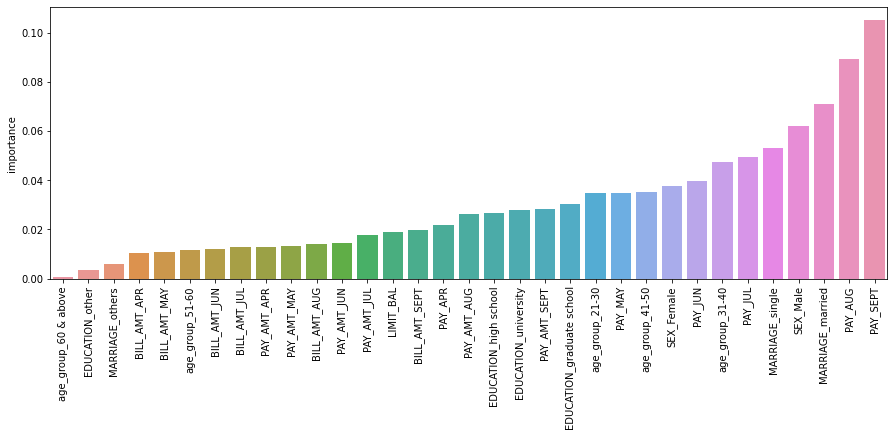

In [347]:
#visualizing the feature importance of variable for random forest
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [348]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [349]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 0.9458min 

score matrix for train
********************************************************************************
The accuracy is  0.8747984335406588
The precision is  0.9433588412134463
The recall is  0.7968948401246682
The f1 is  0.8639634566047181
the auc  is  0.8746283188096045

confusion_matrix 
  [[16573   829]
 [ 3519 13807]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     17402
           1       0.94      0.80      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8661022805805114
The precision is  0.939736733854381
The recall is  0.7842430484037075
The f1 is  0.8549775449101796
the auc  is  0.8666432633322885

confusion_matrix 
  [[5

### Hyperparameter tuning for SVM

In [354]:
params={'C':[0.01,0.1,1],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params,scoring='recall')

In [355]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 11.2896min 

score matrix for train
********************************************************************************
The accuracy is  0.8747984335406588
The precision is  0.9433588412134463
The recall is  0.7968948401246682
The f1 is  0.8639634566047181
the auc  is  0.8746283188096045

confusion_matrix 
  [[16573   829]
 [ 3519 13807]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.95      0.88     17402
           1       0.94      0.80      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8661022805805114
The precision is  0.939736733854381
The recall is  0.7842430484037075
The f1 is  0.8549775449101796
the auc  is  0.8666432633322885

confusion_matrix 
  [[

In [356]:
#getting the best estimator
svc_grid_model.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [357]:
#getting the best parameter
svc_grid_model.best_params_

{'C': 1, 'kernel': 'rbf'}

---
#XGboost
---

In [358]:
from xgboost import XGBClassifier

In [359]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [360]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.067min 

score matrix for train
********************************************************************************
The accuracy is  0.872206864777701
The precision is  0.9302884615384616
The recall is  0.8041094309130786
The f1 is  0.8626091263698843
the auc  is  0.8720581633360933

confusion_matrix 
  [[16358  1044]
 [ 3394 13932]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     17402
           1       0.93      0.80      0.86     17326

    accuracy                           0.87     34728
   macro avg       0.88      0.87      0.87     34728
weighted avg       0.88      0.87      0.87     34728



score matrix for test
********************************************************************************
The accuracy is  0.8659295093296475
The precision is  0.9256972111553785
The recall is  0.7976313079299691
The f1 is  0.8569057717130739
the auc  is  0.8663808713562889

confusion_matrix 
  [[53

### Hyperparameter tuning for Xgboost

In [361]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [362]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.9min finished


Training time: 4.2106min 

score matrix for train
********************************************************************************
The accuracy is  0.9515664593411657
The precision is  0.9898547094188377
The recall is  0.9122705760129285
The f1 is  0.9494803868564907
the auc  is  0.951480650608464

confusion_matrix 
  [[17240   162]
 [ 1520 15806]]

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     17402
           1       0.99      0.91      0.95     17326

    accuracy                           0.95     34728
   macro avg       0.95      0.95      0.95     34728
weighted avg       0.95      0.95      0.95     34728



score matrix for test
********************************************************************************
The accuracy is  0.8745680718728404
The precision is  0.9254863813229572
The recall is  0.8165121867490559
The f1 is  0.867590734999088
the auc  is  0.8749517455484411

confusion_matrix 
  [[53

In [363]:
#getting the best estimator
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [364]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  



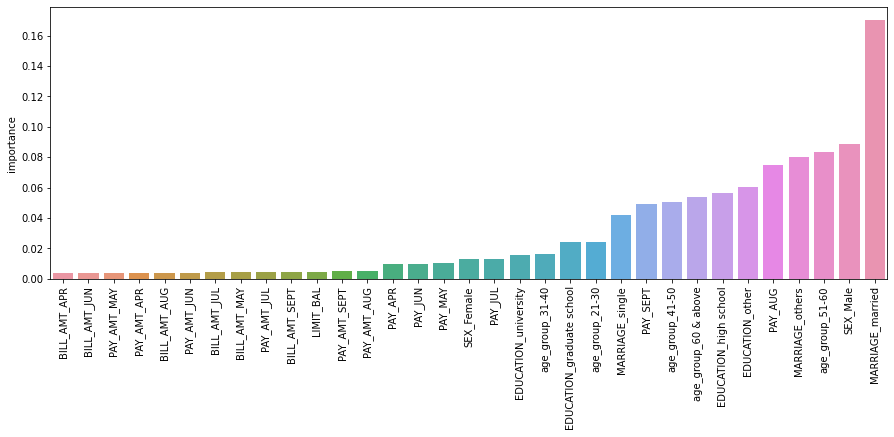

In [365]:
#visaulizing feature importance
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [366]:
!pip install catboost

     |████████████████████████████████| 76.4 MB 23 kB/s 


In [367]:
from catboost import CatBoostClassifier

In [368]:
cb_model=CatBoostClassifier(verbose=0)

In [369]:
cb_model=CatBoostClassifier()

In [370]:
# training and evaluating the cb model
run_and_evaluate_model(cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.04686
0:	learn: 0.6683886	total: 60ms	remaining: 60s
1:	learn: 0.6381330	total: 70.5ms	remaining: 35.2s
2:	learn: 0.6186219	total: 82.3ms	remaining: 27.3s
3:	learn: 0.5872201	total: 93.9ms	remaining: 23.4s
4:	learn: 0.5560943	total: 105ms	remaining: 20.8s
5:	learn: 0.5375866	total: 116ms	remaining: 19.2s
6:	learn: 0.5216461	total: 127ms	remaining: 18s
7:	learn: 0.4982108	total: 146ms	remaining: 18s
8:	learn: 0.4796474	total: 157ms	remaining: 17.2s
9:	learn: 0.4739751	total: 172ms	remaining: 17s
10:	learn: 0.4610022	total: 183ms	remaining: 16.5s
11:	learn: 0.4558449	total: 196ms	remaining: 16.1s
12:	learn: 0.4437552	total: 209ms	remaining: 15.9s
13:	learn: 0.4390651	total: 222ms	remaining: 15.6s
14:	learn: 0.4333710	total: 234ms	remaining: 15.3s
15:	learn: 0.4245318	total: 245ms	remaining: 15.1s
16:	learn: 0.4161034	total: 257ms	remaining: 14.9s
17:	learn: 0.4107953	total: 269ms	remaining: 14.7s
18:	learn: 0.4080406	total: 280ms	remaining: 14.5s
19:	learn: 0.40163

### Hyperparameter tuning for Catboost

In [371]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='recall',verbose=0,n_jobs=-1)

In [372]:
# training and evaluating the catboost model with hyperparameter tuing
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.266888
0:	learn: 0.5635147	total: 42.1ms	remaining: 6.27s
1:	learn: 0.4286143	total: 73.9ms	remaining: 5.47s
2:	learn: 0.3821162	total: 106ms	remaining: 5.19s
3:	learn: 0.3695341	total: 142ms	remaining: 5.17s
4:	learn: 0.3512596	total: 189ms	remaining: 5.47s
5:	learn: 0.3417329	total: 237ms	remaining: 5.69s
6:	learn: 0.3273842	total: 270ms	remaining: 5.52s
7:	learn: 0.3186153	total: 302ms	remaining: 5.36s
8:	learn: 0.3154892	total: 334ms	remaining: 5.24s
9:	learn: 0.3134429	total: 363ms	remaining: 5.09s
10:	learn: 0.3108870	total: 395ms	remaining: 4.99s
11:	learn: 0.3075117	total: 426ms	remaining: 4.9s
12:	learn: 0.3048521	total: 461ms	remaining: 4.86s
13:	learn: 0.3030464	total: 492ms	remaining: 4.78s
14:	learn: 0.3017892	total: 523ms	remaining: 4.71s
15:	learn: 0.3008344	total: 557ms	remaining: 4.67s
16:	learn: 0.2978349	total: 587ms	remaining: 4.59s
17:	learn: 0.2962404	total: 619ms	remaining: 4.54s
18:	learn: 0.2943008	total: 653ms	remaining: 4.5s
19:	learn: 

In [373]:
#getting the best estimator
optimal_catboost_model=grid_cb_model.best_estimator_

In [374]:
#getting the featre importance
grid_cb_model.best_estimator_.feature_importances_

array([3.18304262, 2.77580069, 1.678143  , 1.62789962, 0.65804248,
       0.43456475, 0.65833595, 2.239728  , 1.0380309 , 0.74444933,
       1.23891908, 0.99453188, 1.1986769 , 2.03651594, 1.726048  ,
       1.70966754, 1.74976262, 1.65672008, 2.1552691 , 7.51504668,
       6.80058337, 6.17641422, 4.80854666, 1.12839917, 6.97818225,
       6.86902898, 0.54077751, 7.98164208, 7.22421663, 6.77575654,
       5.08470205, 2.31497492, 0.29758046])

==========================Features Importance============================




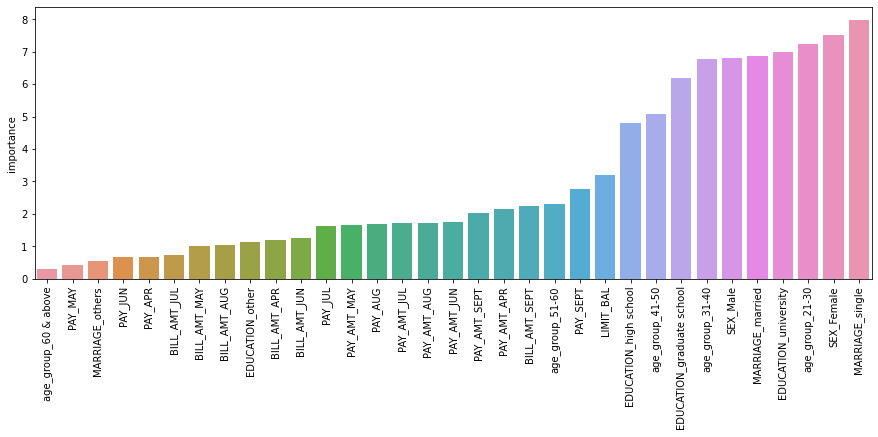

In [375]:
# visualizing feature importance
get_features_importance(optimal_catboost_model,X_train)

In [376]:
grid_cb_model.best_params_

{'max_depth': 9, 'n_estimators': 150}

# Model's Score matrix

In [377]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [378]:
# list of all models
model_name=['Logestic Regrestion','grid_log_regg','Desision Tree','Random forest','grid random forest','SVM','Grid SVM','XGboost','Grid Xgboost','CATBoost','Grid Catboost']

In [379]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [380]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [381]:
matrix_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.862301,0.951944,0.765019,0.848306,0.862944
1,grid_log_regg,0.852799,0.929733,0.765362,0.839578,0.853377
2,Desision Tree,0.821527,0.896959,0.729145,0.804393,0.822138
3,Random forest,0.874914,0.903279,0.841572,0.871335,0.875134
4,grid random forest,0.847011,0.889529,0.794713,0.839452,0.847357
5,SVM,0.866102,0.939737,0.784243,0.854978,0.866643
6,Grid SVM,0.866102,0.939737,0.784243,0.854978,0.866643
7,XGboost,0.865930,0.925697,0.797631,0.856906,0.866381
8,Grid Xgboost,0.874568,0.925486,0.816512,0.867591,0.874952
9,CATBoost,0.871372,0.926283,0.808788,0.863557,0.871785
